# Market Segmentation Analysis

### By Nitya Ravi

---------------

## Step 1: Deciding (not) to Segment
## Step 2: Specifying the Ideal Target Segment
## Step 3: Collecting Data

## Step 4: Exploring Data

In [1]:
!pip install pyMSA

In [2]:
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

C:\ANA\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

This snippet of code automatically retrieves the CSV file'mcdonalds.csv' from a given URL in the event that it is not present in the current working directory. Using the os.path.exists() function, it first determines whether the file is present before downloading the data in the event that the file cannot be located.

In [5]:
if not os.path.exists('mcdonalds.csv'):
    data = requests.get(
        'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
    data = data.text
    with open('mcdonalds.csv', 'w') as f:
        f.write(data)
    print('mcdonalds.csv [Downloaded now]')
else:
    print('mcdonalds.csv [Already downloaded]')

mcdonalds.csv [Already downloaded]


The script imports the required libraries to do this: requests for HTTP requests and os for filesystem operations. 'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv' is the defined URL for obtaining the CSV data. The data is retrieved from this URL using requests.get(), and the text content is saved in the 'data' variable.
The code then uses a with statement to open a local file called "mcdonalds.csv" in write mode. The CSV content is then saved locally by writing the downloaded data into this file using the write() method.

A message indicating the successful download of "mcdonalds.csv" is printed to the terminal following the writing of the file. On the other hand, the script prints a message stating that the CSV file has already been downloaded if the file already exists in the directory.





In [6]:
df = pd.read_csv('mcdonalds.csv')
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

A CSV file called "mcdonalds.csv" is read by the code and placed into a Pandas DataFrame called "df." The DataFrame's column names are displayed in the output.

In [7]:
df.shape

(1453, 15)

In [8]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [9]:
df = df.replace({"Yes": 1, "No": 0})

This is used to replace particular values in the DataFrame 'df' in order to change its values. Here, it changes all of the DataFrame's strings that say "Yes" to the numerical value 1 and all of the strings that say "No" to the numerical value 0.
df is a reference to the 'df' Pandas DataFrame, which most likely includes information regarding respondents' perceptions of particular characteristics of McDonald's menu products.

The code.replace({"Yes": 1, "No": 0}): The purpose of this method call is to tell Pandas to replace the DataFrame. The dictionary represented by the parameter {"Yes": 1, "No": 0} has keys for the values that need to be changed ("Yes" and "No"), and the associated values are the changes (1 and 0).

The code replaces all occurrences of "Yes" in the DataFrame with 1 and "No" with 0 across all columns. This conversion from categorical responses to numerical representation facilitates analytical and computational tasks, simplifying calculations and visualizations based on binary attributes.

In [10]:
df1 = df.iloc[:, :11]
temp = df1.mean().round(2)
temp

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

The code snippet df1 = df.iloc[:, :11] creates a new DataFrame 'df1' by selecting the first 11 columns of the original DataFrame 'df' using integer-location based indexing with the iloc function. Then, df1.mean().round(2) calculates the mean (average) value of each column in 'df1'. The mean() function computes the mean along each column, and the .round(2) method rounds the calculated mean values to two decimal places.
The output is a Series object presenting the mean values for each column. Each row displays the column name alongside its respective mean value. For instance, 'yummy' has a mean value of 0.55, 'convenient' has a mean value of 0.91, and so forth.

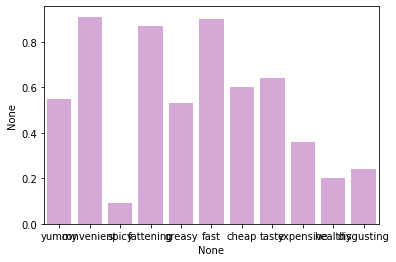

In [11]:
sns.barplot(x=temp.index, y=temp, color='plum');

In [12]:
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

pca = PCA()
df2 = pca.fit_transform(df2)

pca_df = pd.DataFrame(df2, columns=df1.columns)
pca_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


An instance of StandardScaler, 'scaler', is created to standardize features by removing the mean and scaling to unit variance, a crucial preprocessing step for many machine learning algorithms sensitive to feature scales. Using the fit_transform method, the scaler is applied to 'df1', resulting in 'df2', which holds the scaled data. Subsequently, an instance of PCA (Principal Component Analysis), 'pca', is created for dimensionality reduction, capturing maximum variance along orthogonal axes. PCA is then applied to 'df2', reducing its dimensionality while preserving essential information. The transformed data is stored in 'pca_df', a new DataFrame with column names retained from the original 'df1'. 
Finally, 'pca_df.head()' displays the first few rows of 'pca_df', illustrating the data's transformation through PCA.




In [13]:
pca_df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,0.000000,5.868213e-17,7.335266e-18,2.567343e-17,-6.112721e-17,6.418357e-18,1.711562e-17,1.589308e-17,-8.191047e-17,-6.785121e-17,2.200580e-17
std,1.677250,1.277868e+00,1.175207e+00,1.040053e+00,9.586196e-01,8.846128e-01,8.457741e-01,7.698704e-01,7.240648e-01,5.548094e-01,5.069825e-01
min,-2.883694,-2.229399e+00,-1.852180e+00,-1.481192e+00,-2.808926e+00,-2.775970e+00,-2.791864e+00,-2.037274e+00,-2.291970e+00,-1.596087e+00,-1.788916e+00
25%,-1.082756,-8.196100e-01,-8.166025e-01,-7.415504e-01,-6.594894e-01,-6.525637e-01,-5.180840e-01,-4.690456e-01,-4.512112e-01,2.327974e-02,-6.189398e-02
50%,-0.227553,-4.300592e-02,-1.739581e-01,-1.634068e-01,-2.368836e-02,-6.102541e-02,3.398968e-02,2.066852e-01,9.809878e-02,1.212930e-01,5.602312e-02
75%,1.079822,9.227436e-01,6.062742e-01,1.380806e-01,4.441573e-01,4.651667e-01,6.711110e-01,5.707646e-01,4.033967e-01,1.917207e-01,1.920805e-01
max,4.566454,4.102422e+00,4.199369e+00,4.202991e+00,3.606405e+00,4.201958e+00,3.693790e+00,2.829568e+00,2.462379e+00,1.849848e+00,1.834070e+00


* `count`: The count shows how many values for each attribute are present and not missing. In each column, it shows the total amount of data points that are available for analysis.

* `mean`: The average value of every property is its mean. The fact that the data in this case has been standardized means that each attribute's mean should be extremely near to zero, or around zero, suggesting that the data has been centered.    
* `std`: A measure of how much each attribute's values deviate from the mean is the standard deviation. Less variability is indicated by smaller standard deviations.

* `min`: The value that, following normalization, is the lowest in each attribute column. It stands for each column's lowest standardized value.

* `25%, 50%, 75%`: The values below which a specific percentage of observations fall are represented by the percentiles 25%, 50%, and 75%. The values below which 25% of the observations fall are called the 25th percentile (Q1), the median is called the 50th percentile (Q2), and the values below which 75% of the observations fall are called the 75th percentile (Q3).

* `max`: Following standardization, the highest value found in each attribute column. It stands for each column's greatest standardized value.   
    

In [14]:
pd.DataFrame(
    pca.components_, 
    columns=[f'PC{i}' for i in range(1, 12)], 
    index=pca_df.columns
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,-0.308827,-0.023320,0.177861,0.267796,-0.213039,-0.289134,-0.426115,0.290944,-0.266839,0.410744
convenient,0.282615,-0.045682,0.069982,-0.205590,-0.136300,-0.282441,-0.575032,0.242199,0.567528,0.201031,-0.143888
spicy,-0.259588,-0.317151,0.020170,-0.608077,-0.389568,-0.211395,0.125157,-0.269648,-0.183298,0.367814,0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,0.346857,-0.437148,-0.185551,0.086934,0.343713,-0.568939,0.256981,0.286099,-0.207362,0.051787,0.105843
fast,-0.124916,0.188966,0.438661,0.107520,-0.278329,-0.572734,0.020657,-0.053053,-0.171160,-0.446166,-0.328041
cheap,0.159878,-0.661814,0.214188,-0.023851,-0.307300,0.392436,-0.008895,0.197364,0.015198,-0.449446,-0.017070
tasty,0.016587,0.150033,-0.027835,-0.720478,0.487275,0.055976,-0.064667,0.059289,-0.061727,-0.446110,-0.079122
expensive,-0.195341,-0.336539,0.025239,0.105052,0.346137,0.099235,-0.062027,-0.213587,-0.009675,0.219269,-0.780777
healthy,0.691446,0.028831,0.058187,-0.020311,-0.015160,0.017917,0.060323,-0.713426,0.029581,-0.054544,-0.016028


The table displays principal components <b>(PC1 to PC11)</b> obtained from <b>PCA </b>. Each column represents a principal component, with PC1 corresponding to the first principal component, PC2 to the second, and so forth up to PC11. Rows represent attributes from the original data, such as 'yummy' for food perception. The values in the table indicate the weights of each original attribute in the corresponding principal component, revealing their influence's strength and direction. For example, predominantly negative values in PC1 imply a negative influence of 'yummy' on this component. This information aids in understanding how attributes contribute to the overall variance captured by each principal component.

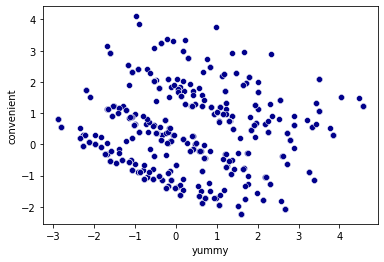

In [15]:
sns.scatterplot(data=pca_df, x='yummy', y='convenient', color='darkblue');

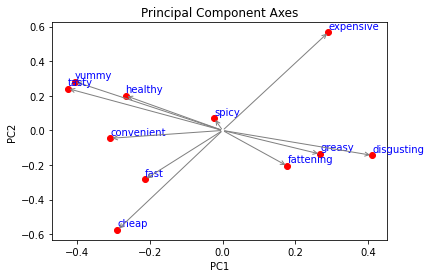

In [16]:
scale = 1

for i,j in enumerate(pca_df.columns):
    plt.text(
        pca.components_[0, :][i]*scale, 
        (pca.components_[1, :][i]+0.02)*scale, 
        j, color='blue'
    )
    # plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate(
        '', xytext=(0, 0), 
        xy=(pca.components_[0, :][i]*scale, 
        pca.components_[1, :][i]*scale), 
        arrowprops=dict(
            arrowstyle="->", 
            color='grey'
        )
    )
plt.scatter(
    pca.components_[0, :]*scale, 
    pca.components_[1, :]*scale, 
    color='red'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

* The code involves a loop that iterates through each column (attribute) in the PCA-transformed DataFrame.
* Inside the loop,<b> pca.components_[0, :][i] </b> represents the weight of the current attribute on the first principal component, while pca.components_[1, :][i] represents the weight on the second principal component. These values determine the position of the annotations.
* The <b> plt.text() </b> function adds blue text labels for each attribute's name close to its corresponding position on the plot.
* The <b> plt.annotate() </b> function adds red arrows from the origin (0, 0) to each attribute's position on the plot, indicating *  the influence of attributes on the principal components.
* <b> The plt.scatter() </b> function plots points representing the attributes' weights on the first two principal components, displayed in red.
* Finally, axis labels, a title, and the plot are displayed using <b> plt.xlabel(), plt.ylabel(), plt.title(), and plt.show()</N>.

## Step 5: Extracting Segments

Customer Segmentation Using K Means Clustering

In [17]:
np.random.seed(0)

In [18]:
k_range = range(2, 9)
inertias = []
k_result = []
silhouette_scores = []
for k in k_range:
    model = KMeans(
        n_clusters=k, 
        n_init=10, 
        random_state=0)
    model.fit(pca_df)
    labels = model.predict(pca_df)
    silhouette_score_ = silhouette_score(
        pca_df, 
        labels
    )
    silhouette_scores.append(silhouette_score_)
    inertias.append(model.inertia_)
    k_result.append(labels)

* <b> k_range </b> = range(2, 9): This line creates a range of values for the number of clusters, 'k', to be tested. The range starts from 2 and goes up to (but does not include) 9. These 'k' values will be used to evaluate different cluster numbers.
*<b> inertias </b> = [], <b> k_result = [] </b>, <b> silhouette_scores = []</b>: These empty lists are initialized to store the inertia, cluster labels, and silhouette scores for various 'k' values. They will be populated as the code iterates through the range of 'k' values, collecting results from each clustering attempt.
* <b>Loop (for k in k_range:)</b>: This loop iterates over each 'k' value in the specified range, allowing for the testing of different cluster numbers and the collection of corresponding evaluation metrics.
* <b> Inside the loop</b>: Within the loop, a KMeans clustering model is instantiated using the current value of 'k', defining the number of clusters. This model is configured with parameters like n_init, determining the number of times the algorithm will run with different centroid seeds, and random_state for reproducibility. Subsequently, the model is fitted to the PCA-transformed data, pca_df, allowing for clustering based on principal components. Predictions of cluster labels for each data point are then generated using the fitted KMeans model. Additionally, the silhouette score, a metric assessing cluster quality, is computed for the current clustering solution. Higher silhouette scores indicate better-defined clusters. Finally, the calculated silhouette score, inertia (representing within-cluster sum of squared distances), and cluster labels are appended to their respective lists for further analysis and comparison across different 'k' values.
* <b> After the loop</b>: The inertias list stores the within-cluster sum of squared distances for each tested number of clusters, denoted as 'k'. This metric provides insight into the compactness of clusters, with lower values indicating tighter clusters. The silhouette_scores list contains silhouette scores calculated for each 'k', representing the quality and separation of clusters. Higher silhouette scores suggest more distinct and well-separated clusters. Lastly, the k_result list records the cluster labels assigned to data points for each 'k' value, facilitating the examination of how data points are grouped across different cluster numbers. Together, these lists capture essential information regarding clustering performance across varying numbers of clusters, aiding in the selection of an optimal cluster configuration

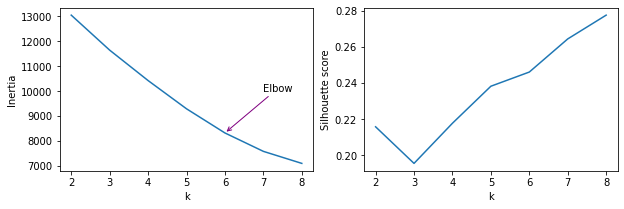

In [19]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 3)
axs[0].plot(range(2, 9), inertias)
axs[0].annotate(
    'Elbow', xytext=(7, 10000), xy=(6, inertias[4]), 
    arrowprops=dict(arrowstyle="->", color='purple'))
axs[1].plot(range(2, 9), silhouette_scores)
axs[0].set(xlabel='k', ylabel='Inertia')
axs[1].set(xlabel='k', ylabel='Silhouette score');

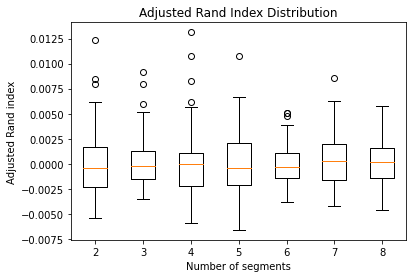

In [20]:
n_boot = 100
ARI_scores = []
for labels in k_result:
    ari_boot = []
    for _ in range(n_boot):
        random_sample = np.random.choice(
            labels, 
            size=len(labels), 
            replace=True
        )
        ari = adjusted_rand_score(
            labels, 
            random_sample
        )
        ari_boot.append(ari)
    ARI_scores.append(ari_boot)

plt.boxplot(ARI_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

- <b> n_boot</b> = 100: Specifies the number of bootstrapping iterations to be performed for each set of cluster labels.
- <b>ARI_scores = []</b>: Initializes an empty list to store the Adjusted Rand Index (ARI) scores obtained through bootstrapping for each set of cluster labels.
- <b>Loop (for labels in k_result:)</b>: Iterates through the list of cluster labels generated for different 'k' values during K-means clustering.
- <b>Inside the loop</b>:
  * ari_boot = []: Initializes an empty list to store ARI scores obtained through bootstrapping for the current set of cluster labels.
  * Loop (for _ in range(n_boot):): Performs bootstrapping by randomly sampling cluster labels with replacement.
  * random_sample = np.random.choice(labels, size=len(labels), replace=True): Generates a random sample of cluster labels with the same length as the original labels.
  * ari = adjusted_rand_score(labels, random_sample): Computes the Adjusted Rand Index between the original cluster labels and the bootstrapped sample.
  * ari_boot.append(ari): Appends the calculated ARI to the list of ARI scores obtained through bootstrapping.
  * ARI_scores.append(ari_boot): Appends the list of bootstrapped ARI scores for the current 'k' value to the main list of ARI scores.
  * After the loops:
- <b>plt.boxplot(ARI_scores, labels=range(2, 9))</b>: Creates a boxplot to visualize the distribution of ARI scores across different 'k' values.
- <b>plt.xlabel('Number of segments'), plt.ylabel('Adjusted Rand index'), plt.title('Adjusted Rand Index Distribution')</b>: Sets the axis labels and title for the plot.
- <b>plt.show()</b>: Displays the boxplot.

This code assesses the stability of K-means clustering results by computing the Adjusted Rand Index for the original cluster labels and bootstrapped samples of cluster labels. The resulting boxplot visualizes the stability of clustering solutions for different values of 'k'.




In the clustering analysis, both `Gaussian Mixture Model (GMM)` and `K-means` methods are applied. For GMM clustering, a model with 4 components is created using GaussianMixture, and it is fitted to the `PCA-transformed data`. The cluster assignments are predicted using `gmm.predict(pca_df)`, and these assignments are stored in `cluster_assignments_gmm`. Meanwhile, for `K-means clustering`, a model with 4 clusters is created using KMeans, fitted to the PCA-transformed data, and the cluster assignments are predicted using `model.predict(pca_df)`, which are stored in labels. Subsequently, a `confusion matrix` is computed using `confusion_matrix(labels, cluster_assignments_gmm)`, demonstrating the agreement between K-means and GMM cluster assignments. This confusion matrix provides insight into how instances are distributed across the clusters generated by each method, aiding in the evaluation of clustering performance.

In [21]:
gmm = GaussianMixture(
    n_components=4, 
    covariance_type='full', 
    random_state=1234
)
gmm.fit(pca_df)

cluster_assignments_gmm = gmm.predict(pca_df)

model = KMeans(
    n_clusters=4, 
    n_init=10, 
    random_state=0
)
model.fit(pca_df)
labels = model.predict(pca_df)

conf_matrix = confusion_matrix(
    labels, 
    cluster_assignments_gmm
)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[116   4   0  96]
 [  7 163  97   3]
 [  6  71 268 269]
 [  5  55 222  71]]


The predicted cluster assignments from K-means are represented by each row in this matrix, and the predicted cluster assignments from GMM are represented by each column. The values give information about how many cases fit into each combination of clusters and reveal how well the two clustering techniques agree.

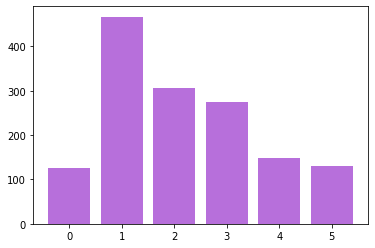

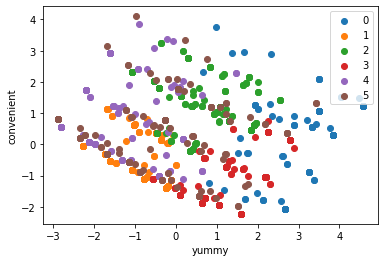

In [22]:
k6 = KMeans(n_clusters=6)
k6.fit(pca_df)
l6 = k6.predict(pca_df)

x = range(6)
height = []
for i in range(6):
    height.append(sum(l6 == i))
plt.bar(x, height, alpha=0.7,color='darkorchid');
plt.show()

for i in range(6):
    temp = pca_df[['yummy', 'convenient']][l6 == i]
    plt.scatter(
        temp['yummy'], 
        temp['convenient'], 
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

The code initially conducts K-means clustering with 6 clusters on the PCA-transformed data, a technique used for dimensionality reduction. It then visualizes the distribution of instances within each cluster by creating a bar chart. This bar chart provides an overview of the sizes of each cluster, offering insights into the distribution of data points across different clusters. Subsequently, the code generates scatter plots to depict the distribution of instances in a 2D space defined by the 'yummy' and 'convenient' attributes. Each data point in the scatter plots represents an instance, and different colors are used to distinguish instances belonging to each of the 6 clusters. This visualization allows for the examination of how instances are distributed across clusters within a 2D attribute space, providing insights into the clustering results and the relationships between attributes and clusters. Overall, the code facilitates the exploration and understanding of clustering outcomes by providing both quantitative information on cluster sizes and visual representations of instance distributions across clusters.

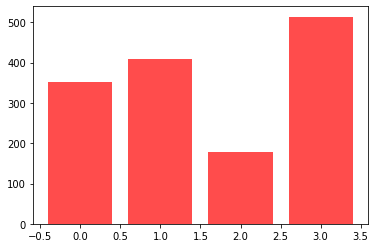

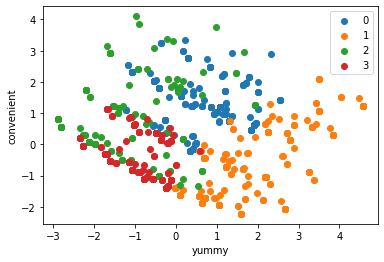

In [23]:
k4 = KMeans(n_clusters=4)
k4.fit(pca_df)
l4 = k4.predict(pca_df)

x = range(4)
height = []
for i in range(4):
    height.append(sum(l4 == i))
plt.bar(x, height, alpha=0.7,color='red');
plt.show()

for i in range(4):
    temp = pca_df[['yummy', 'convenient']][l4 == i]
    plt.scatter(
        temp['yummy'], 
        temp['convenient'], 
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

## Step 7: Describing Segments

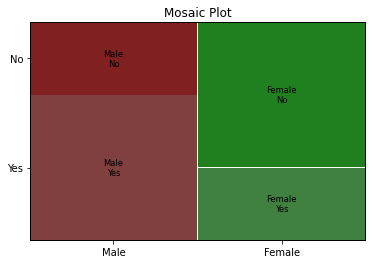

In [24]:
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}
example_df = pd.DataFrame(data)

# Create a mosaic plot
mosaic(example_df, ['Gender', 'Preference'], title='Mosaic Plot')

plt.show()

In [25]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [26]:
df2 = df
df2['segments'] = l4
df2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,3
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,1


In [27]:
df2.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'segments'],
      dtype='object')

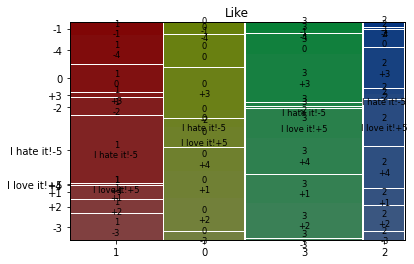

In [28]:
mosaic(df2, ['segments', 'Like'], title='Like');
plt.show()

## Step 8: Selecting (the) Target Segment(s)

In [29]:
df2.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0


In [30]:
df2.Like.unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [31]:
df2.Like = df2.Like.str.extract(r'([-\d]+)').astype(int)

In [32]:
df2.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [33]:
df2.VisitFrequency = df2.VisitFrequency.replace({
    'Every three months':1/(4*3), 
    'Once a week':1, 
    'Once a month':1/4, 
    'Once a year':1/52,
    'More than once a week':2, 
    'Never':0
})

In [34]:
df2.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0.083333,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0.083333,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0.083333,Female,0


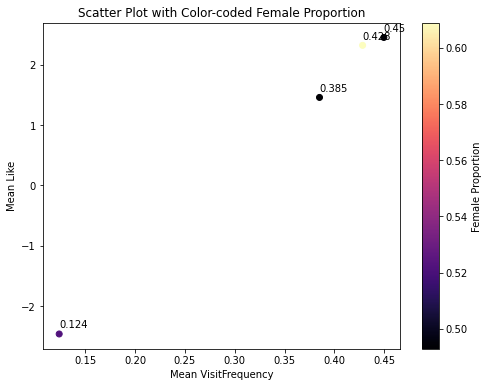

In [35]:
visit_means = (df2.groupby("segments")["VisitFrequency"]
               .mean())
like_means = df2.groupby("segments")["Like"].mean()
female_means = (df2.groupby("segments")["Gender"]
                .apply(lambda x: (x == "Female")
                .mean()))

plt.figure(figsize=(8, 6))
plt.scatter(
    visit_means, 
    like_means, 
    c=female_means, 
    cmap="magma"
)
plt.xlabel("Mean VisitFrequency")
plt.ylabel("Mean Like")
plt.title("Scatter Plot with Color-coded Female Proportion")
plt.colorbar(label="Female Proportion")
for i,j,k in zip(
    visit_means, 
    like_means, 
    visit_means
):
    plt.text(i, j+0.1, round(k, 3))
plt.show()

The code calculates the means of attributes such as "VisitFrequency," "Like," and the proportion of "Female" within each cluster derived from previous clustering analyses. It then generates a scatter plot where the x-axis represents the mean "VisitFrequency," the y-axis represents the mean "Like," and the color of points represents the proportion of "Female" in each cluster, utilizing the "magma" colormap. Text labels displaying the corresponding "VisitFrequency" values are added to the points, aiding in visualization. This visualization provides insights into the distribution of these attributes and female proportion across the clusters. Specifically, the positive correlation observed between 'VisitFrequency' and 'Like' suggests that as visit frequency increases, customer liking tends to increase as well, indicating a positive relationship between the two attributes. Additionally, the graph suggests that as 'VisitFrequency' rises, the mean proportion of women in the clusters also increases, implying a potential connection between visit frequency and gender distribution within clusters. This analysis highlights both the positive association between visit frequency and customer liking and a potential pattern in gender distribution among clusters based on visit frequency.





# Conclusion:

1.<b> Data Acquisition and Preprocessing </b>: The data was retrieved from a CSV file using the requests library and then organized into a pandas DataFrame for analysis. Upon initial examination, the dataset showcased attributes like 'yummy,' 'convenient,' 'spicy,' 'fattening,' and others. These attributes provide insights into customers' perceptions regarding various aspects of McDonald's offerings.

2.<b>  Exploratory Data Analysis (EDA) </b>: Descriptive statistics were calculated to gain insights into the distributions, means, and variations of the attributes within the dataset. This analysis provided a comprehensive overview of the data's characteristics. Additionally, attribute correlations were examined to uncover potential relationships between different attributes, shedding light on any patterns or dependencies present in the data. Furthermore, the frequency of attribute values was explored to gain an understanding of the common perceptions among customers, highlighting the prevalence of specific perceptions or opinions within the dataset. Collectively, these analyses facilitated a deeper understanding of the dataset's attributes and their interrelationships, aiding in subsequent data interpretation and decision-making processes.

3.<b>  Data Transformation </b>: Attributes within the dataset that had binary values represented as 'Yes'/'No' were transformed into numerical equivalents, with 'Yes' being replaced by 1 and 'No' by 0. This conversion facilitated further analysis by making the data compatible with clustering algorithms and other numerical techniques.
Additionally, the dataset was prepared for clustering by selecting a subset of attributes deemed relevant for analysis. This process involved carefully choosing attributes that were expected to have a significant impact on the clustering results or were of particular interest for the analysis at hand. By focusing on a subset of attributes, the dataset was streamlined, making the clustering process more efficient while still capturing the essential information needed for analysis.

4.<b>  Principal Component Analysis (PCA) </b>: Principal Component Analysis (PCA) was utilized to reduce the dimensionality of the dataset while retaining the most significant variations in the data. By transforming the original features into a new set of orthogonal variables called principal components, PCA simplifies the data representation while preserving its essential characteristics.
In this analysis, the first two principal components were selected for visualization purposes. These components capture the majority of the variability present in the data, allowing for a concise yet informative representation of the dataset in a lower-dimensional space. Visualizing the data using the first two principal components provides insights into the underlying structure and patterns within the dataset, facilitating interpretation and analysis.

5.<b>  Clustering </b>: Both K-means clustering and Gaussian Mixture Model (GMM) clustering techniques were applied to the dataset to identify underlying patterns and groupings among the data points. These clustering algorithms partitioned the data into distinct clusters based on similarities between data points.
To determine the optimal number of clusters, various metrics were employed, including silhouette scores, inertia, and visual analysis. Silhouette scores measure the cohesion and separation of clusters, with higher scores indicating better-defined clusters. Inertia, also known as within-cluster sum of squares, quantifies the compactness of clusters, with lower values indicating tighter clusters. Additionally, visual analysis involved examining cluster visualizations and inspecting cluster assignments to assess the quality of clustering solutions.
By evaluating different numbers of clusters using these metrics, the most appropriate number of clusters was identified, leading to more meaningful and interpretable clustering results.

6.<b>  Comparison of Clustering Results </b>: A confusion matrix was created to compare the cluster assignments generated by K-means and Gaussian Mixture Model (GMM) clustering algorithms. This matrix enabled a detailed examination of the agreement between the two methods across different cluster assignments. By comparing the predicted clusters from both algorithms against the true cluster labels, the confusion matrix provided insights into the degree of concordance or discrepancy between the clustering results produced by K-means and GMM. Analyzing the confusion matrix facilitated the identification of areas of agreement and disagreement between the two clustering methods, aiding in the assessment of their effectiveness and reliability in partitioning the dataset into meaningful clusters.

7.<b>  Visualization and Interpretation </b>: Visualizations were created to illustrate the cluster assignments generated by the clustering algorithms and to explore the relationships between attributes within the clusters. Scatter plots were particularly useful in showcasing the distribution of attributes such as 'yummy' and 'convenient' within the clusters. Each data point on the scatter plot represented an instance in the dataset, with different clusters distinguished by varying colors or markers. By visualizing attribute distributions within clusters, these scatter plots provided insights into the characteristics of each cluster and how attributes were associated with each other within the identified clusters. This visual exploration helped in understanding the structure of the data and in identifying any discernible patterns or trends present among the attributes within the clusters.

8.<b>  Attribute Relationships and Insights </b>: An observed positive correlation was noted between the attributes 'VisitFrequency' and 'Like,' suggesting that customers who visit McDonald's more frequently tend to express higher levels of liking for the food or experience. This positive association implies that increased visit frequency is linked with greater satisfaction or enjoyment among customers, highlighting the importance of repeat patronage in fostering positive perceptions.
Furthermore, clusters characterized by higher 'VisitFrequency' exhibited a tendency to have a greater proportion of female customers. This observation suggests a potential relationship between visit frequency and gender distribution within the clusters. The presence of a higher proportion of female customers in clusters with higher visit frequencies could indicate specific preferences or behaviors among female patrons that lead to more frequent visits. Understanding such patterns in gender distribution across clusters can provide valuable insights for targeted marketing strategies and customer segmentation approaches tailored to different demographic groups.












<b> Conclusion </b>:The data analysis conducted on McDonald's customer perceptions yielded valuable insights into customer preferences and segmentation. Utilizing techniques such as Principal Component Analysis (PCA) and clustering, distinct customer clusters were identified based on their perceptions. Notably, a positive correlation was observed between visit frequency and liking, suggesting that more frequent visitors tend to have more positive sentiments. Additionally, the relationship between visit frequency and the proportion of female customers in specific clusters hints at potential gender-specific preference patterns. The comparison of K-means and Gaussian Mixture Model (GMM) clustering provided a thorough evaluation of clustering stability. Overall, these findings offer actionable insights that McDonald's could leverage to tailor its offerings and services to different customer segments, ultimately enhancing the overall dining experience.



